In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
from google.colab import files
uploded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
startup=pd.read_csv("50_Startups.csv")
startup.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

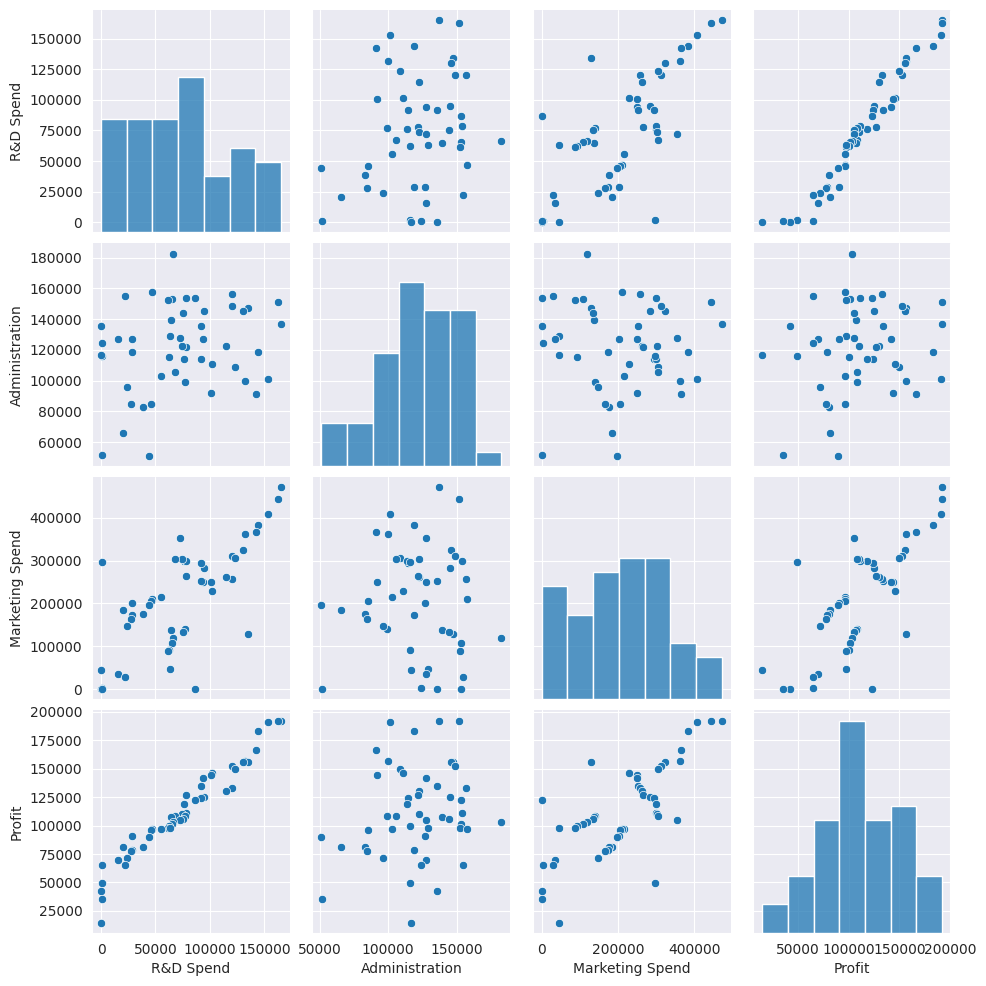

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [8]:
startup1=startup.rename({'R&D Spend':'RandD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
startup1.head()

RandD      Admin  Marketing       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

In [9]:
startup1.describe()

RandD          Admin      Marketing         Profit
count      50.000000      50.000000      50.000000      50.000000
mean    73721.615600  121344.639600  211025.097800  112012.639200
std     45902.256482   28017.802755  122290.310726   40306.180338
min         0.000000   51283.140000       0.000000   14681.400000
25%     39936.370000  103730.875000  129300.132500   90138.902500
50%     73051.080000  122699.795000  212716.240000  107978.190000
75%    101602.800000  144842.180000  299469.085000  139765.977500
max    165349.200000  182645.560000  471784.100000  192261.830000

In [10]:
model=smf.ols('Profit~RandD+Admin+Marketing',data=startup1).fit()

In [11]:
model.params

Intercept    50122.192990
RandD            0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [12]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 28 May 2023   Prob (F-statistic):           4.53e-30
Time:                        07:06:44   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD          0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
startup1['prediction_model']=model.fittedvalues
startup1['error_model']=model.resid
startup1['Y']= 50122.192+ 0.805715*startup1['RandD']-0.026816*startup1['Admin']+0.027228*startup1['Marketing']+startup1['error_model']
startup1

RandD      Admin  Marketing       State     Profit  prediction_model  \
0   165349.20  136897.80  471784.10    New York  192261.83     192521.252890   
1   162597.70  151377.59  443898.53  California  191792.06     189156.768232   
2   153441.51  101145.55  407934.54     Florida  191050.39     182147.279096   
3   144372.41  118671.85  383199.62    New York  182901.99     173696.700026   
4   142107.34   91391.77  366168.42     Florida  166187.94     172139.514183   
5   131876.90   99814.71  362861.36    New York  156991.12     163580.780571   
6   134615.46  147198.87  127716.82  California  156122.51     158114.096669   
7   130298.13  145530.06  323876.68     Florida  155752.60     160021.363048   
8   120542.52  148718.95  311613.29    New York  152211.77     151741.699699   
9   123334.88  108679.17  304981.62  California  149759.96     154884.684110   
10  101913.08  110594.11  229160.95     Florida  146121.95     135509.016367   
11  100671.96   91790.61  249744.55  California  144259.40     135573.712961   
12   93863.75  127320.38  249839.44     Florida  141585.52     129138.054182   
13   91992.39  135495.07  252664.93  California  134307.35     127487.991663   
14  119943.24  156547.42  256512.92     Florida  132602.65     149548.646335   
15  114523.61  122616.84  261776.23    New York  129917.04     146235.159985   
16   78013.11  121597.55  264346.06  California  126992.93     116915.405401   
17   94657.16  145077.58  282574.31    New York  125370.37     130192.447208   
18   91749.16  114175.79  294919.57     Florida  124266.90     129014.226806   
19   86419.70  153514.11       0.00    New York  122776.86     115635.216367   
20   76253.86  113867.30  298664.47  California  118474.03     116639.669231   
21   78389.47  153773.43  299737.29    New York  111313.02     117319.451640   
22   73994.56  122782.75  303319.26     Florida  110352.25     114706.981717   
23   67532.53  105751.03  304768.73     Florida  108733.99     109996.615221   
24   77044.01   99281.34  140574.81    New York  108552.04     113362.966113   
25   64664.71  139553.16  137962.62  California  107404.34     102237.725065   
26   75328.87  144135.98  134050.07     Florida  105733.54     110600.575350   
27   72107.60  127864.55  353183.81    New York  105008.31     114408.071457   
28   66051.52  182645.56  118148.20     Florida  103282.38     101660.026005   
29   65605.48  153032.06  107138.38    New York  101004.64     101794.983452   
30   61994.48  115641.28   91131.24     Florida   99937.59      99452.372936   
31   61136.38  152701.92   88218.23    New York   97483.56      97687.856276   
32   63408.86  129219.61   46085.25  California   97427.84      99001.328985   
33   55493.95  103057.49  214634.81     Florida   96778.92      97915.007805   
34   46426.07  157693.92  210797.67  California   96712.80      89039.273741   
35   46014.02   85047.44  205517.64    New York   96479.51      90511.599568   
36   28663.76  127056.21  201126.82     Florida   90708.19      75286.174585   
37   44069.95   51283.14  197029.42  California   89949.14      89619.537708   
38   20229.59   65947.93  185265.10    New York   81229.06      69697.430648   
39   38558.51   82982.09  174999.30  California   81005.76      83729.011977   
40   28754.33  118546.05  172795.67  California   78239.91      74815.953991   
41   27892.92   84710.77  164470.71     Florida   77798.83      74802.556239   
42   23640.93   96189.63  148001.11  California   71498.49      70620.411821   
43   15505.73  127382.30   35534.17    New York   69758.98      60167.039963   
44   22177.74  154806.14   28334.72  California   65200.33      64611.354916   
45    1000.23  124153.04    1903.93    New York   64926.08      47650.649687   
46    1315.46  115816.21  297114.46     Florida   49490.75      56166.206853   
47       0.00  135426.92       0.00  California   42559.73      46490.588983   
48     542.05   51743.15       0.00    New York   35673.41      49171.388158   
49      

In [15]:
print(model.tvalues)

Intercept     7.626218
RandD        17.846374
Admin        -0.525507
Marketing     1.655077
dtype: float64


In [16]:
model.pvalues

Intercept    1.057379e-09
RandD        2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [17]:
#calculating VIF
rsq_RandD= smf.ols('RandD~Admin+Marketing',data=startup1).fit().rsquared  
vif_RandD = 1/(1-rsq_RandD)
rsq_Admin= smf.ols('Admin~RandD+Marketing',data=startup1).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)
rsq_Marketing= smf.ols('Marketing~Admin+RandD',data=startup1).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing)

In [18]:
d1 = {'Variables':['RandD','Admin','Marketing'],'VIF':[vif_RandD,vif_Admin,vif_Marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0      RandD  2.468903
1      Admin  1.175091
2  Marketing  2.326773

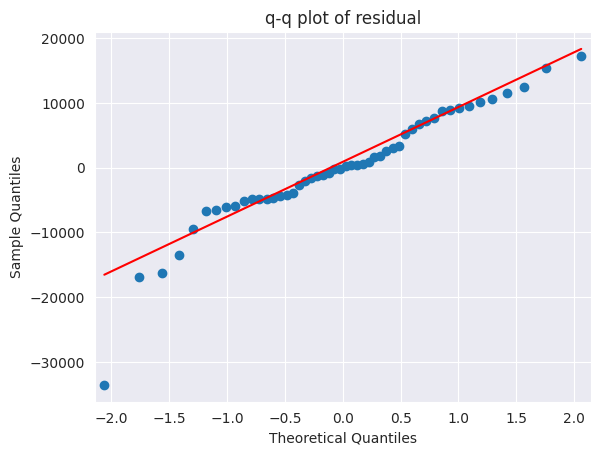

In [19]:
# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

sm.qqplot(model.resid,line='q')
plt.title('q-q plot of residual')
plt.show()

In [20]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

<Axes: >

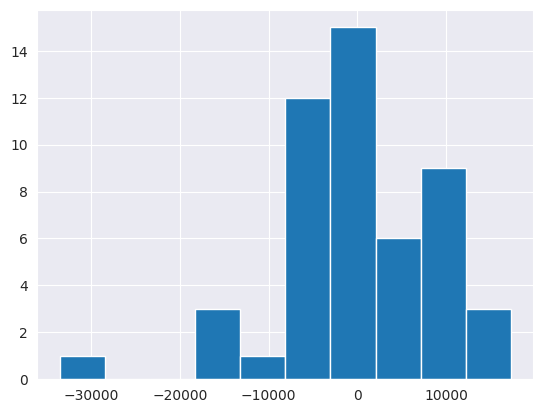

In [22]:
model.resid.hist()

<Axes: >

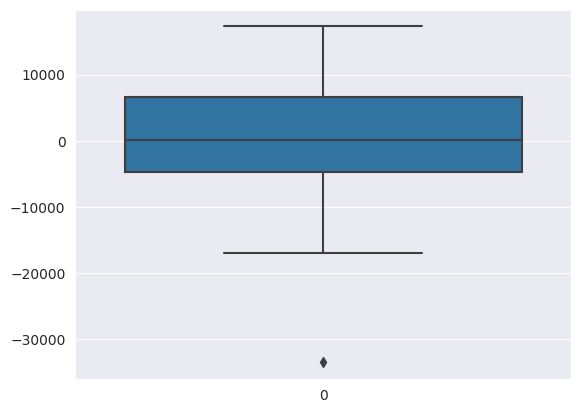

In [21]:
sns.boxplot(model.resid)

<Axes: xlabel='error_model', ylabel='Density'>

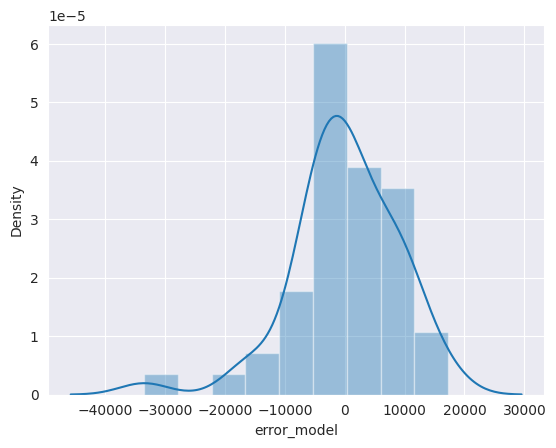

In [23]:
sns.distplot(startup1['error_model'])

In [24]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

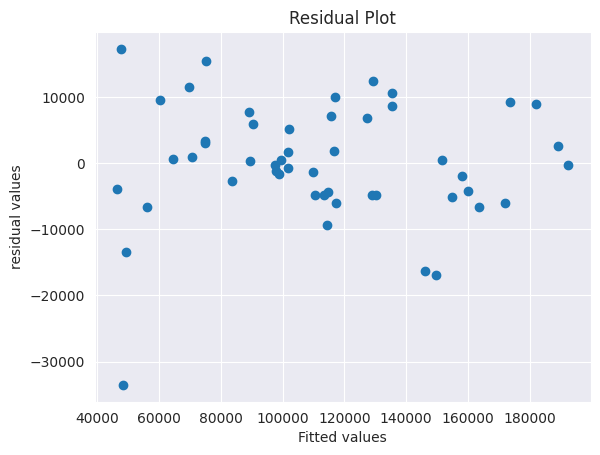

In [25]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('residual values')
plt.show()

In [26]:
def get_standardized( vals ):
    return (vals-vals.mean())/vals.std()

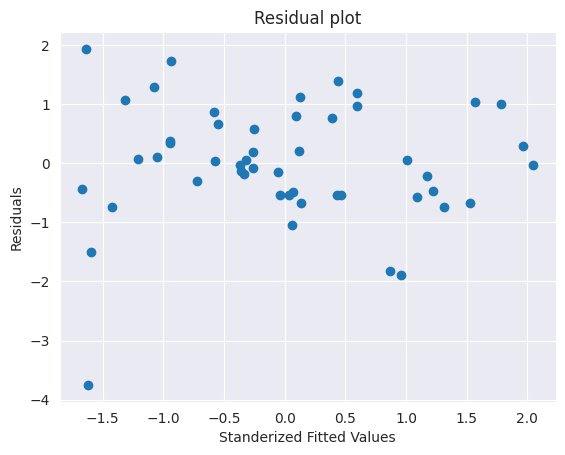

In [27]:
plt.scatter(get_standardized(model.fittedvalues),get_standardized(model.resid))
plt.title('Residual plot')
plt.xlabel('Standerized Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [28]:
get_standardized(model.resid).mean()

-2.6645352591003756e-17

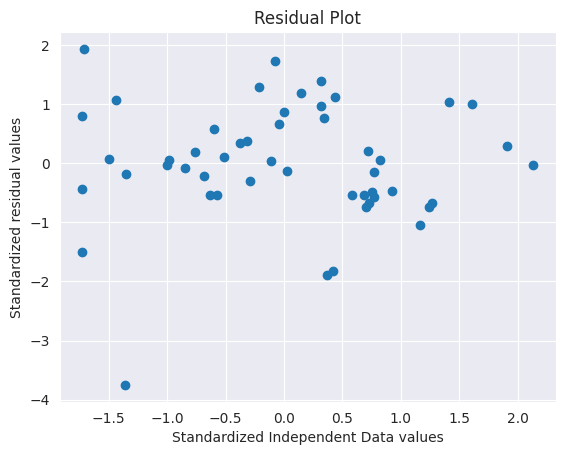

In [29]:
plt.scatter(get_standardized(startup1['Marketing']),
            get_standardized(startup1['error_model']))

plt.title('Residual Plot')
plt.xlabel('Standardized Independent Data values')
plt.ylabel('Standardized residual values')
plt.show()

In [32]:

## Cook’s Distance
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance


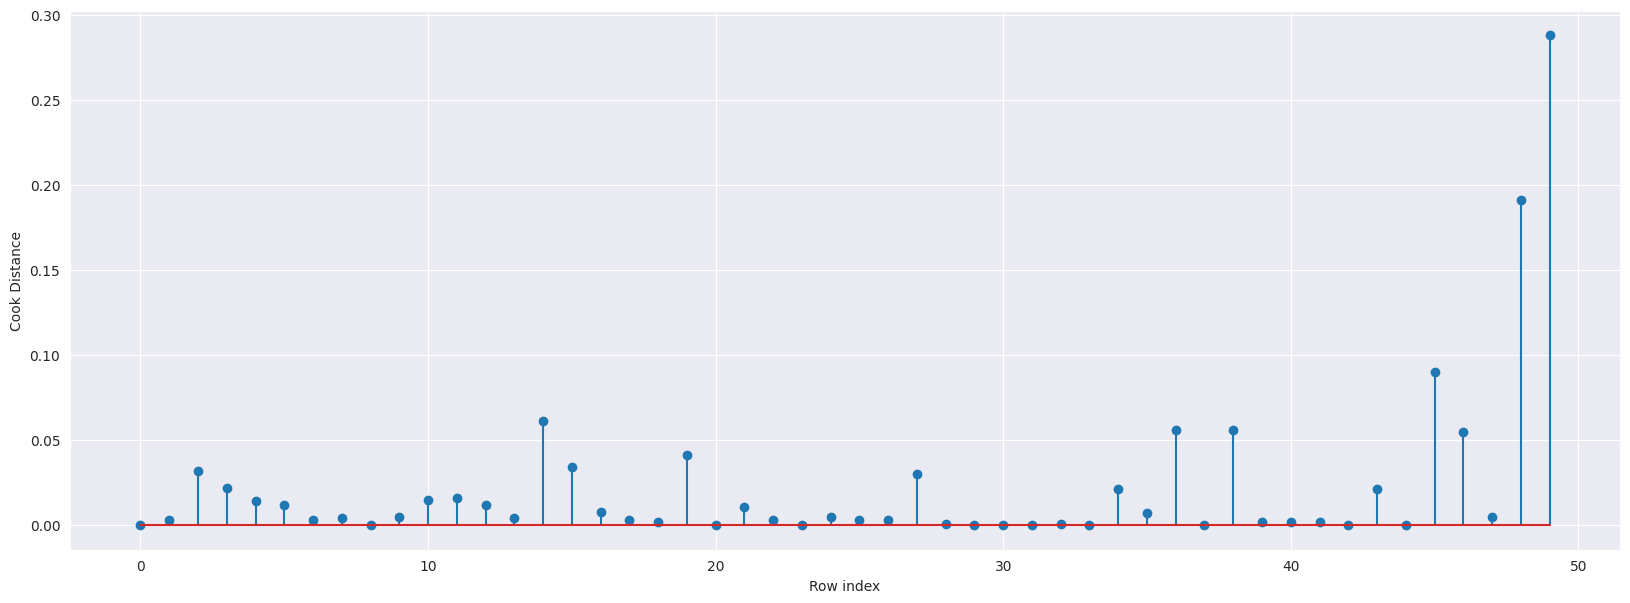

In [33]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cook Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

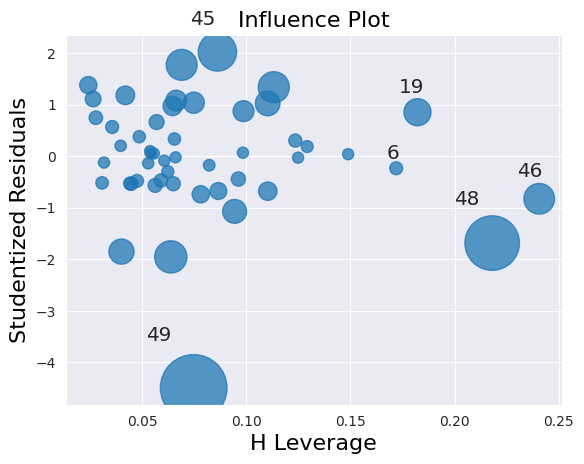

In [36]:
influence_plot(model)
plt.show()

In [37]:
k=startup1.shape[1]
n=startup1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.54

In [38]:
#new data for prediction
newdata=({'RandD':73722,'Admin':121345,'Marketing':211025})
startup2=pd.DataFrame(newdata,index=[1])
y=model.predict(startup2)
print(y)

1    112012.936589
dtype: float64


In [39]:
y1=model.predict(startup1)
y2=np.round(y1,2)
y2=pd.DataFrame(y2,columns=['predicted profit'])
y3=pd.merge(startup1.reset_index(),y2.reset_index())
y3.drop('index',axis=1)

RandD      Admin  Marketing       State     Profit  prediction_model  \
0   165349.20  136897.80  471784.10    New York  192261.83     192521.252890   
1   162597.70  151377.59  443898.53  California  191792.06     189156.768232   
2   153441.51  101145.55  407934.54     Florida  191050.39     182147.279096   
3   144372.41  118671.85  383199.62    New York  182901.99     173696.700026   
4   142107.34   91391.77  366168.42     Florida  166187.94     172139.514183   
5   131876.90   99814.71  362861.36    New York  156991.12     163580.780571   
6   134615.46  147198.87  127716.82  California  156122.51     158114.096669   
7   130298.13  145530.06  323876.68     Florida  155752.60     160021.363048   
8   120542.52  148718.95  311613.29    New York  152211.77     151741.699699   
9   123334.88  108679.17  304981.62  California  149759.96     154884.684110   
10  101913.08  110594.11  229160.95     Florida  146121.95     135509.016367   
11  100671.96   91790.61  249744.55  California  144259.40     135573.712961   
12   93863.75  127320.38  249839.44     Florida  141585.52     129138.054182   
13   91992.39  135495.07  252664.93  California  134307.35     127487.991663   
14  119943.24  156547.42  256512.92     Florida  132602.65     149548.646335   
15  114523.61  122616.84  261776.23    New York  129917.04     146235.159985   
16   78013.11  121597.55  264346.06  California  126992.93     116915.405401   
17   94657.16  145077.58  282574.31    New York  125370.37     130192.447208   
18   91749.16  114175.79  294919.57     Florida  124266.90     129014.226806   
19   86419.70  153514.11       0.00    New York  122776.86     115635.216367   
20   76253.86  113867.30  298664.47  California  118474.03     116639.669231   
21   78389.47  153773.43  299737.29    New York  111313.02     117319.451640   
22   73994.56  122782.75  303319.26     Florida  110352.25     114706.981717   
23   67532.53  105751.03  304768.73     Florida  108733.99     109996.615221   
24   77044.01   99281.34  140574.81    New York  108552.04     113362.966113   
25   64664.71  139553.16  137962.62  California  107404.34     102237.725065   
26   75328.87  144135.98  134050.07     Florida  105733.54     110600.575350   
27   72107.60  127864.55  353183.81    New York  105008.31     114408.071457   
28   66051.52  182645.56  118148.20     Florida  103282.38     101660.026005   
29   65605.48  153032.06  107138.38    New York  101004.64     101794.983452   
30   61994.48  115641.28   91131.24     Florida   99937.59      99452.372936   
31   61136.38  152701.92   88218.23    New York   97483.56      97687.856276   
32   63408.86  129219.61   46085.25  California   97427.84      99001.328985   
33   55493.95  103057.49  214634.81     Florida   96778.92      97915.007805   
34   46426.07  157693.92  210797.67  California   96712.80      89039.273741   
35   46014.02   85047.44  205517.64    New York   96479.51      90511.599568   
36   28663.76  127056.21  201126.82     Florida   90708.19      75286.174585   
37   44069.95   51283.14  197029.42  California   89949.14      89619.537708   
38   20229.59   65947.93  185265.10    New York   81229.06      69697.430648   
39   38558.51   82982.09  174999.30  California   81005.76      83729.011977   
40   28754.33  118546.05  172795.67  California   78239.91      74815.953991   
41   27892.92   84710.77  164470.71     Florida   77798.83      74802.556239   
42   23640.93   96189.63  148001.11  California   71498.49      70620.411821   
43   15505.73  127382.30   35534.17    New York   69758.98      60167.039963   
44   22177.74  154806.14   28334.72  California   65200.33      64611.354916   
45    1000.23  124153.04    1903.93    New York   64926.08      47650.649687   
46    1315.46  115816.21  297114.46     Florida   49490.75      56166.206853   
47       0.00  135426.92       0.00  California   42559.73      46490.588983   
48     542.05   51743.15       0.00    New York   35673.41      49171.388158   
49      